In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13075, done.
remote: Total 13075 (delta 0), reused 0 (delta 0), pack-reused 13075
Receiving objects: 100% (13075/13075), 11.97 MiB | 12.16 MiB/s, done.
Resolving deltas: 100% (9085/9085), done.


In [2]:
cd /content/yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt 

     |████████████████████████████████| 596 kB 4.2 MB/s 
     |██████████████████████████████▋ | 36.5 MB 1.4 MB/s eta 0:00:02

In [ ]:
import torch
import os
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

In [5]:
# Training Yolov5n on VOC dataset 
# Dataset is automatically downloaded if not already present
!python train.py --img 416 --batch 16 --epochs 50 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-167-g488fb0a torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translat

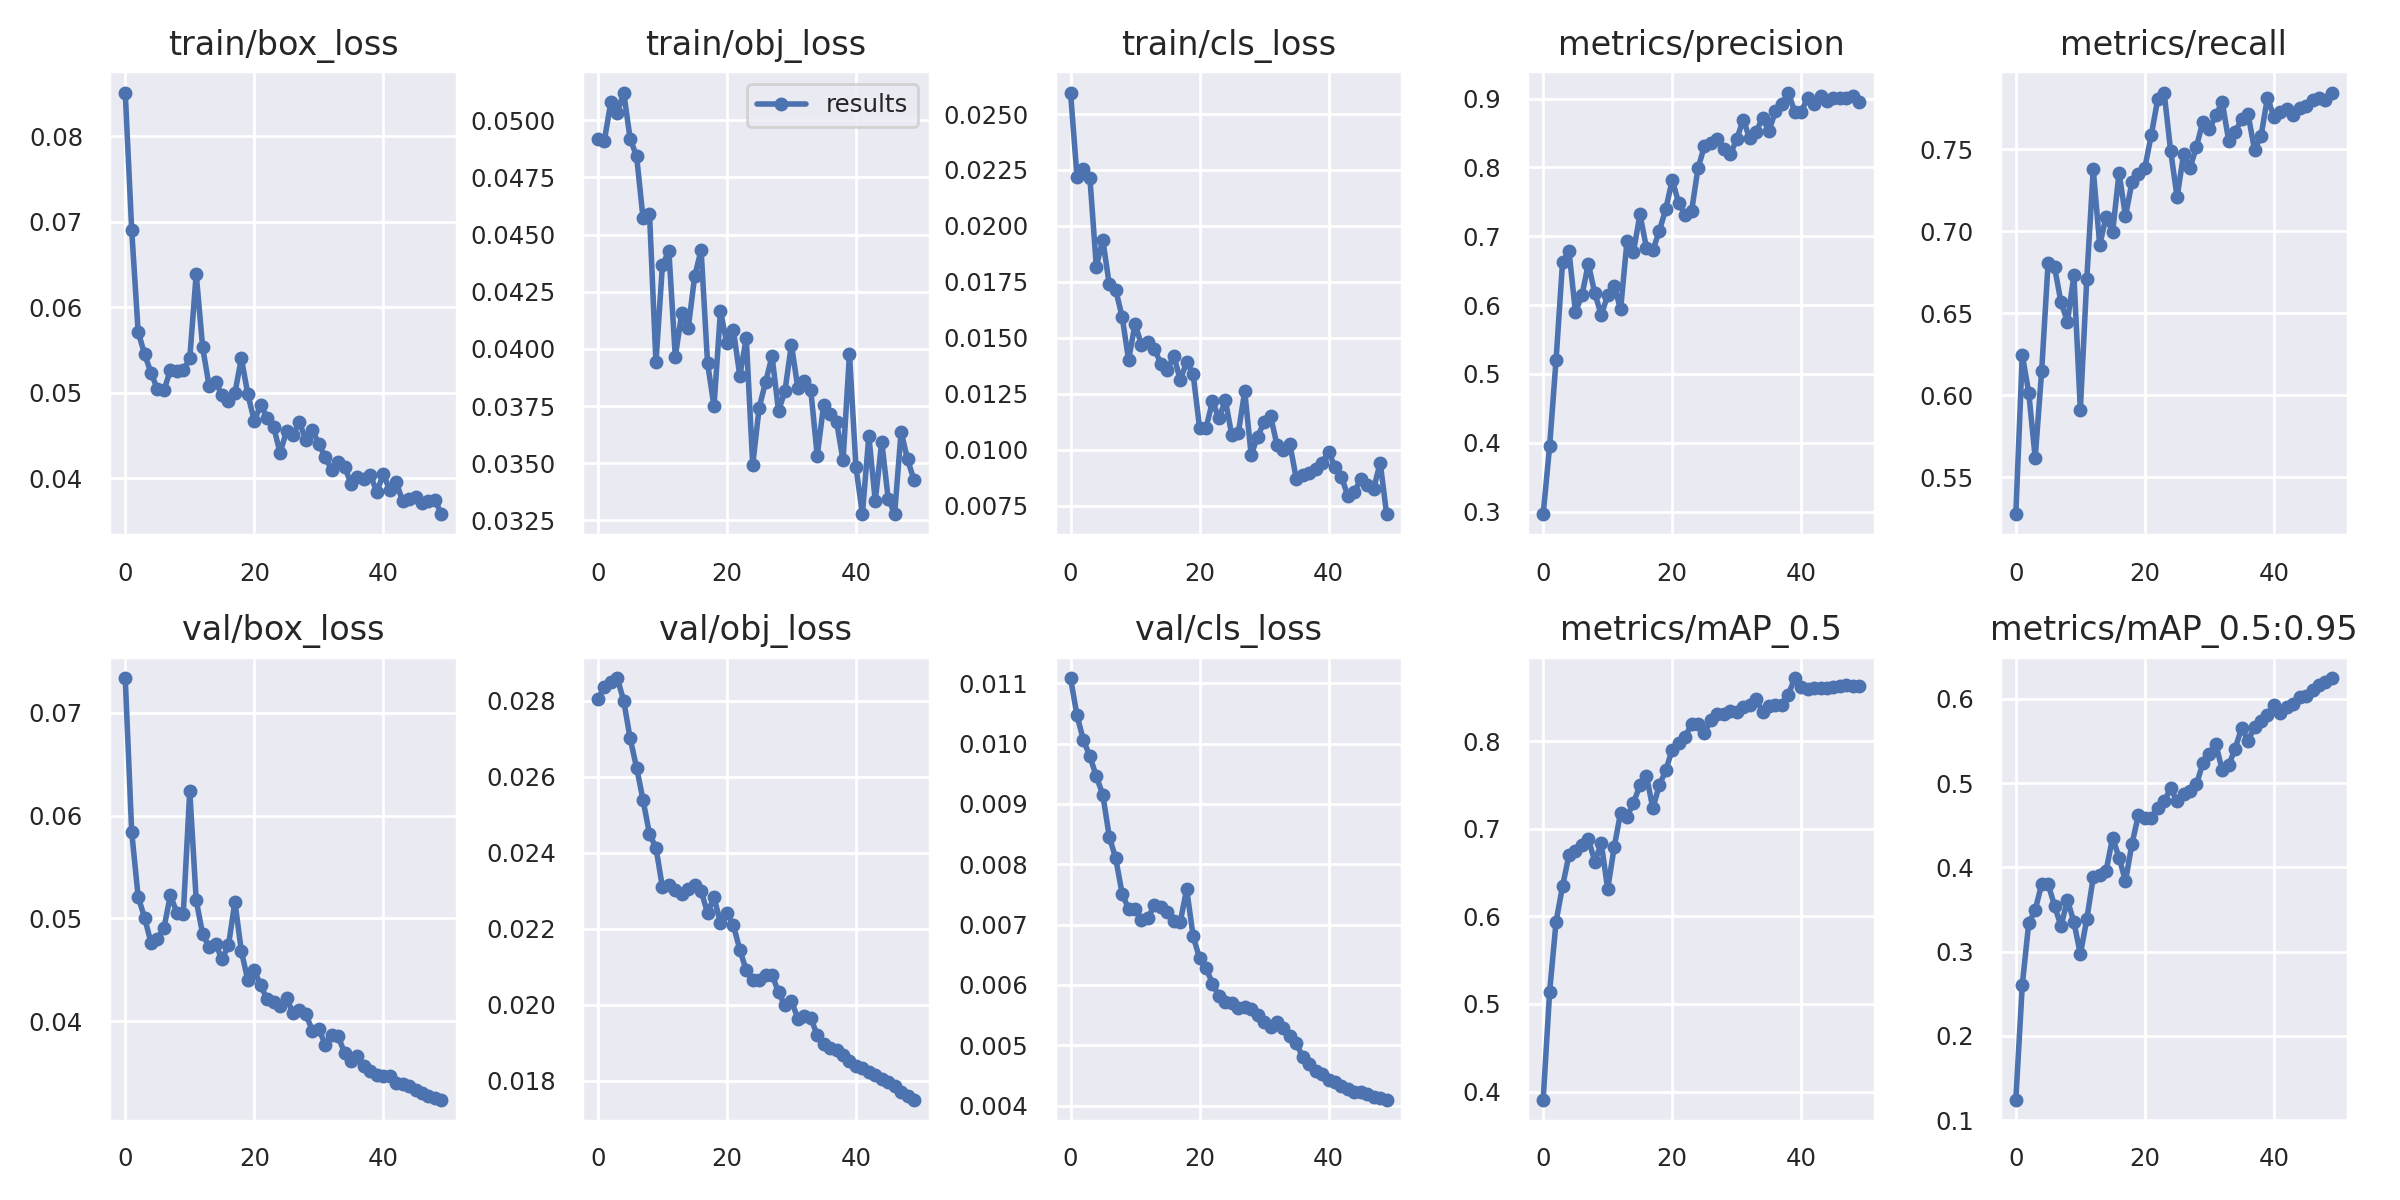

In [6]:
# Display the results of our training
Image(f"/content/yolov5/runs/train/exp/results.png")

In [7]:
# Run a detection on the pretrained yolov5s weights
!python detect.py --source /content/yolov5/data/images/bus.jpg --weights yolov5s.pt

detect: weights=['yolov5s.pt'], source=/content/yolov5/data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-167-g488fb0a torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.025s)
Speed: 0.5ms pre-process, 24.9ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [8]:
# Run a detection on the weights updated during our training loop
!python detect.py --source /content/yolov5/data/images/bus.jpg --weights /content/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-167-g488fb0a torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 2 persons, 1 bus, Done. (0.025s)
Speed: 0.4ms pre-process, 25.0ms inference, 2.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


In [ ]:
class pyTorchHub():
    def __init__(self):
        self.model = torch.hub.load('ultralytics/yolov5', 'yolov5m')   # This command downloads the relevant yolo model 
                                                                       # automatically (e.g. yolov5m) and creates a .pt file
    def predict(self, img):
        results = self.model(img).show()
        return results

In [ ]:
img = '/content/yolov5/data/images/bus.jpg'
x = pyTorchHub()
x.predict(img)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: scipy>=1.5 not found and is required by YOLOv5, attempting auto-update...


In [ ]:
# Run a detection on the pretrained yolov5m weights
!python detect.py --source /content/yolov5/data/images/bus.jpg --weights yolov5m.pt

In [ ]:
# Display the results
detect_path = r'/content/yolov5/runs/detect/exp2'

images = []
for img_path in glob.glob(detect_path + '/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,25))
columns = 4
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)